# Breast Cancer Prediction

# 1. Data Preprocessing:

## Load and browse data:

In [1]:
# Import packages:
import numpy as np # linear algebra
import pandas as pd # dataframe

In [489]:
# Load data:
data = pd.read_csv('breast_cancer_wisconsin-data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [490]:
# Look at distributions of data:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [491]:
print(np.shape(data))

(569, 32)


In [492]:
# Drop ID: 
data.drop(columns = 'id', inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Extract feature names:
feature_names = data.columns
feature_names

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
print(np.shape(data))

(569, 31)


## Assess missing values:

In [8]:
# Look at missing values for each variable:
print(data.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## Define features and outcome variable:

In [9]:
# Feature matrix:
X = data[data.columns[1:]]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Outcome variable: cancerous or not
y = data['diagnosis']
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

## Split train and test:

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
y_train_binary = y_train
y_test_binary = y_test

In [84]:
y_train_binary = y_train_binary.replace(['M'],1)
y_train_binary = y_train_binary.replace(['B'],0)
y_test_binary = y_test_binary.replace(['M'],1)
y_test_binary = y_test_binary.replace(['B'],0)
y_test_binary.head()

86     1
19     0
214    1
229    1
20     0
Name: diagnosis, dtype: int64

In [85]:
print(np.shape(X_train))
print(np.shape(X_test))
print(len(y_train))
print(len(y_test))

(398, 30)
(171, 30)
398
171


# 2. Exploratory Data Analysis and Feature Selection:

## Data visualization 1: frequency count of outcome

In [119]:
import seaborn as sns # data visualization
import matplotlib.pyplot as plt

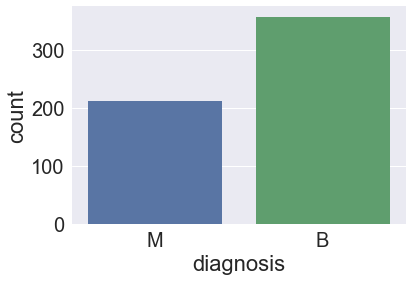

In [120]:
# Counts for malignant and benign:
ax = sns.countplot(x = 'diagnosis', data=data)

## Standardize whole dataset:
Range of each variable varies a lot, could be a problem for distance/variance based methods.

In [88]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
data_scaled = data.iloc[:,1:] # exclude diagnosis
scaled_values = scaler.fit_transform(data_scaled)
data_scaled = pd.DataFrame(scaled_values, columns = feature_names[1:])
data_scaled['diagnosis'] = data.iloc[:, 0]
data_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,M
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,M
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,M
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,M
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,M


## Standardize train and test:

In [89]:
scaler = StandardScaler()
X_train_scaled_values = scaler.fit_transform(X_train)
X_test_scaled_values = scaler.transform(X_test)

In [90]:
X_train_scaled = pd.DataFrame(X_train_scaled_values, columns = feature_names[1:])
X_test_scaled = pd.DataFrame(X_test_scaled_values, columns = feature_names[1:])

## Data visualization 2: boxplot:
To look at distribution of each variable

In [21]:
# Transform dataset for boxplot: 
data_scaled_melt = data_scaled.melt(id_vars = ['diagnosis'])
data_scaled_melt.head()

,diagnosis,variable,value
0,M,radius_mean,1.097064
1,M,radius_mean,1.829821
2,M,radius_mean,1.579888
3,M,radius_mean,-0.768909
4,M,radius_mean,1.750297


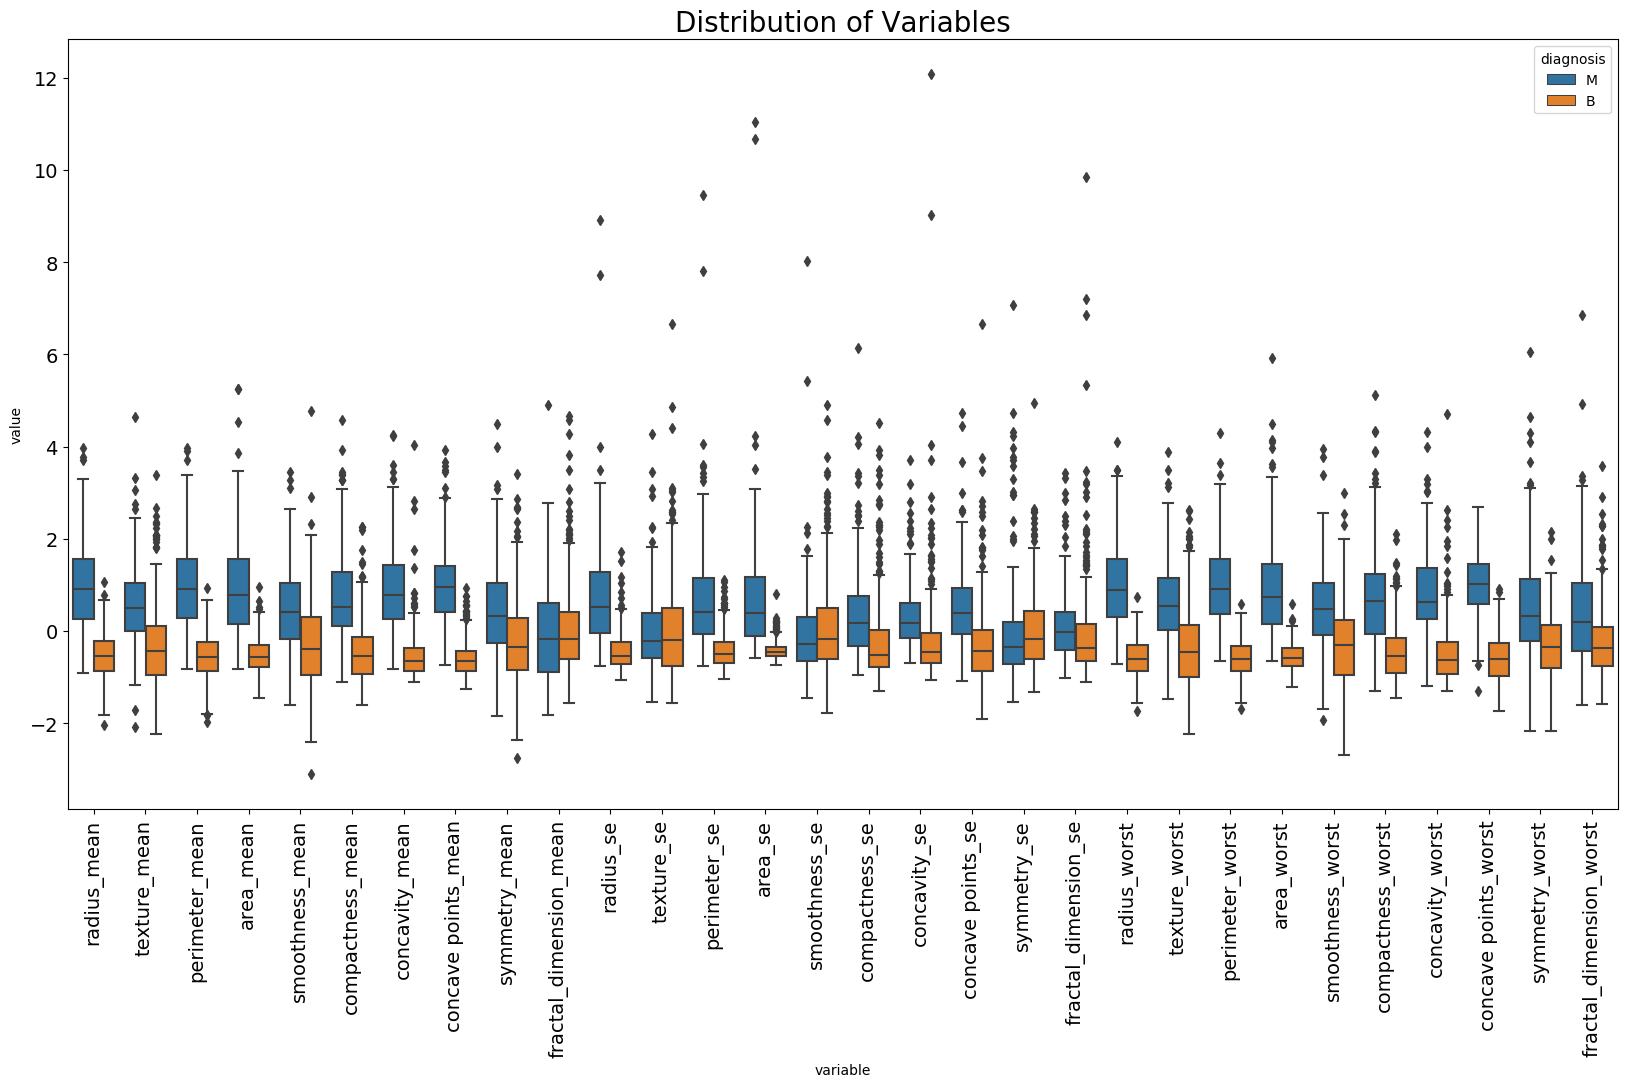

In [639]:
# Boxplot to look at distribution of each variable:
plt.figure(figsize = (20,10))
ax = sns.boxplot(x = 'variable', y = 'value', hue = 'diagnosis', data = data_scaled_melt)
plt.title('Distribution of Variables', fontsize = 20)
plt.xticks(rotation=90)
ax.tick_params(labelsize = 14)

- Lots of outliers
- Generally, mean value of all variables for benign tumors are lower than for malignant tumors 

## Data visualization 3: swarmplot
To get a better idea of how much each variable is separated by benign vs. malignant. Variables that seem to be more associated with the separation might be better in the classification model. 

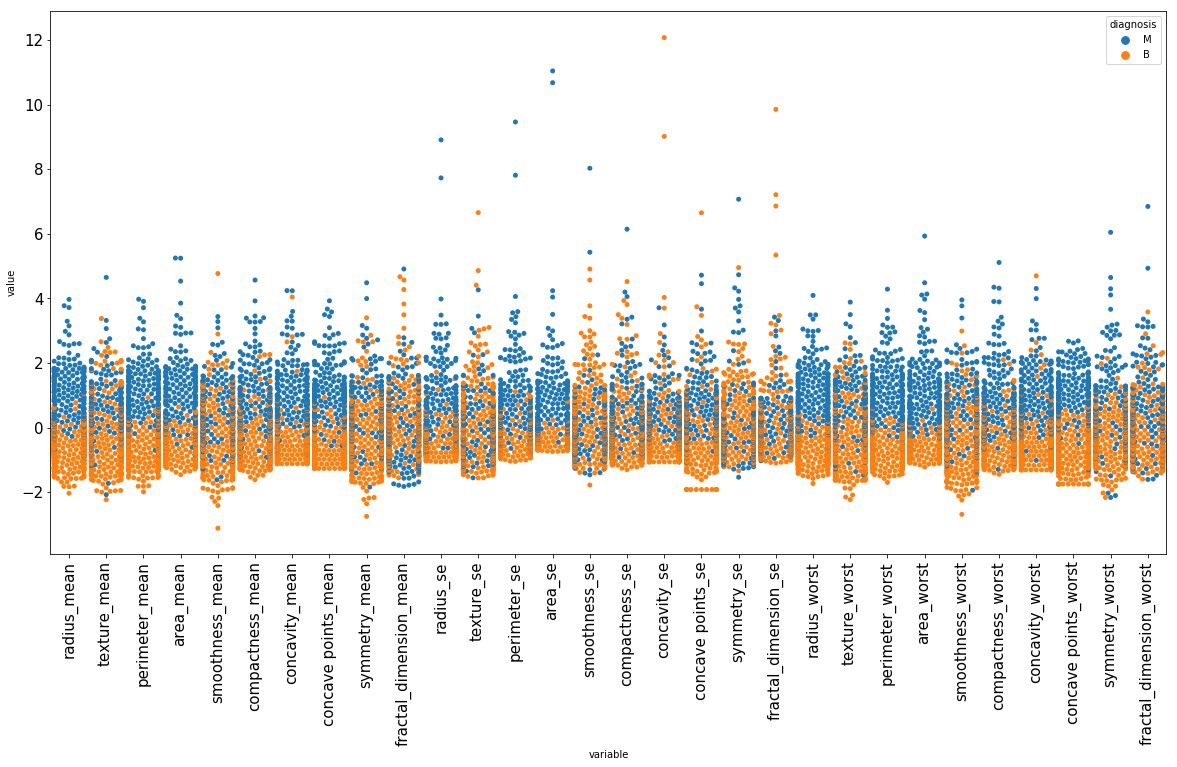

In [23]:
# Swarmplot to look at separation:
plt.figure(figsize = (20,10))
ax = sns.swarmplot(x = 'variable', y = 'value', hue = 'diagnosis', data = data_scaled_melt)
plt.xticks(rotation=90)
ax.tick_params(labelsize = 15)

Variables where benign vs. malignant are relatively well-separated visually:
##### radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave points_mean, radius_se, perimeter_se, area_se, radius_worst, perimeter_worst, area_worst, concave points_worst

Could consider including these variables as features for classification model

## Assess Multicollinearity:

In [24]:
# Calculate correlation between each variable:
corr = data_scaled.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


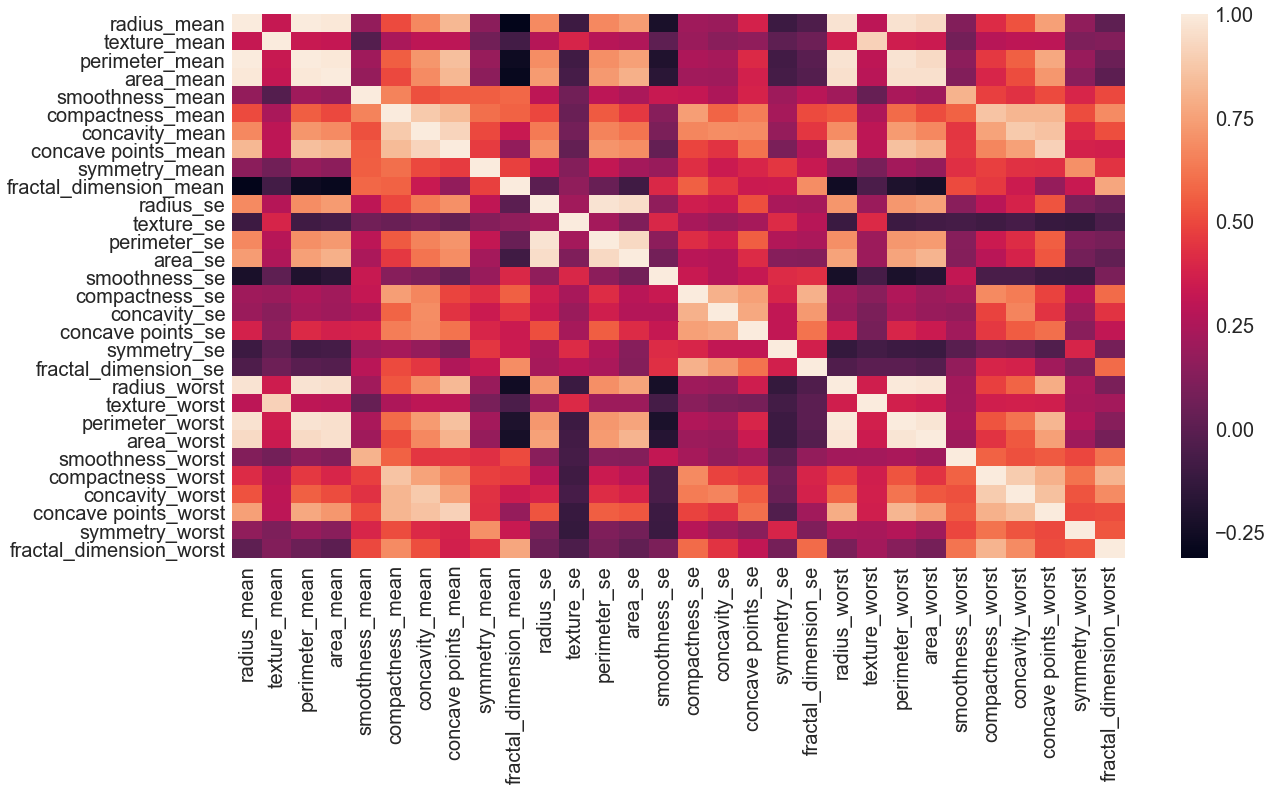

In [25]:
# Use a heatmap to visualize correlation: 
plt.figure(figsize = (20,10))
sns.set(font_scale=2)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Highly correlated features: 
#### {radius_mean, perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst, concave points_mean, concave points_worst}
#### {texture_mean, texture_worst}
#### {smoothness_mean, smoothness_worst}
#### {compactness_mean, concave points_mean, concavity_mean, compactness_worst}
#### {concavity_mean, concave points_worst, concavity_worst, perimeter_worst, radius_worst}
#### {area_se, area_worst}

## PCA: variance explained
To reduce dimensionality and multicollinearity and get a benchmark for expected performance of predictive models

In [26]:
from sklearn.decomposition import PCA

In [27]:
# Apply PCA on training data: 
pca = PCA()
pca.fit_transform(X_train_scaled)
pca.explained_variance_ratio_

array([4.64322848e-01, 1.86481934e-01, 8.32744230e-02, 6.50201310e-02,
       5.19164578e-02, 4.27008587e-02, 2.26193624e-02, 1.52432565e-02,
       1.37535560e-02, 1.20381585e-02, 9.29799403e-03, 7.69104319e-03,
       5.70072886e-03, 5.01878581e-03, 2.89160339e-03, 2.43384644e-03,
       1.97096217e-03, 1.40590288e-03, 1.28841255e-03, 9.75016361e-04,
       9.05993726e-04, 8.22212933e-04, 6.96247936e-04, 6.33813693e-04,
       3.38037000e-04, 2.62923525e-04, 2.22026065e-04, 4.82961388e-05,
       2.06268856e-05, 4.53974495e-06])

Text(0.5,1,'Variance Explained by Top Principle Componenets')

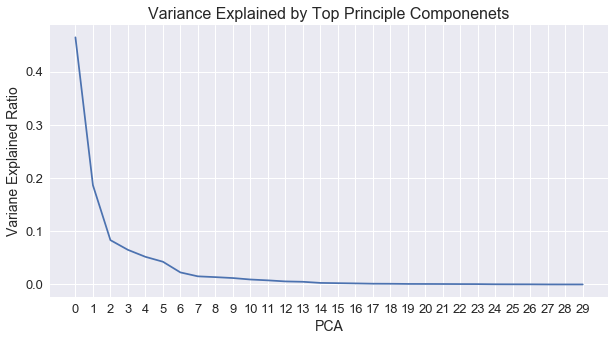

In [28]:
# Plot percentage of variance explained by each PC:
plt.figure(figsize = (10,5))
pcs = np.arange(pca.n_components_)
plt.plot(pcs, pca.explained_variance_ratio_)
plt.xticks(pcs, fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('PCA', fontsize = 14)
plt.ylabel('Variane Explained Ratio', fontsize = 14)
plt.title('Variance Explained by Top Principle Componenets', fontsize = 16)

Significant decrease of variance explained ratio at PC = 2, PC = 6, (and PC = 14). Could use these as a reference of how many features to include in the model. 

In [29]:
# Look at each PC's components as the original variables:
varaince_original = pd.DataFrame(pca.components_, columns = feature_names[1:])

# Look at components of first 6 PCs:
varaince_original.T.iloc[:, :6]

,0,1,2,3,4,5
radius_mean,0.212611,-0.234236,-0.027340,-0.053168,0.022213,0.030838
texture_mean,0.110031,-0.082318,0.080673,0.581345,-0.036211,-0.058904
perimeter_mean,0.221448,-0.214748,-0.026328,-0.054067,0.023984,0.029956
area_mean,0.214746,-0.233301,0.010870,-0.061555,0.007325,0.001906
smoothness_mean,0.144936,0.197338,-0.083209,-0.175531,-0.343793,-0.300110
compactness_mean,0.235223,0.158619,-0.068974,-0.025977,0.019092,-0.012501
concavity_mean,0.255338,0.040808,-0.007717,-0.027330,0.058538,0.007276
concave points_mean,0.253547,-0.030277,-0.023606,-0.084466,-0.055764,-0.045386
symmetry_mean,0.142611,0.190705,-0.019018,-0.055765,-0.330915,0.322569
fractal_dimension_mean,0.066869,0.367378,-0.030096,-0.020253,-0.030806,-0.182456


Look at which variable(s) have more impact in each PC. Could consider including these variables in the model:
- PC1: concavity_mean, concavity points_mean
- PC2: fractal_dimension_mean, fractal_dimension_worst
- PC3: texture_se, smoothness_se
- PC4: texture_mean, texture_worst
- PC5: smoothness_mean, concavity_se
- PC6: symmetry_se, symmetry_worst

## PCA: Dimensionally reduce data to 2D to:
- 1) visualize data points 
- 2) identify any sample subgroups
- 3) if clinical outcome associated with any sample subgroup

In [30]:
pc_2D = PCA(n_components = 2)
X_train_2D = pc_2D.fit_transform(X_train_scaled)

In [31]:
df_train_2D = pd.DataFrame(X_train_2D, columns = ['PC1', 'PC2'], index = X_train.index)
df_train_2D['diagnosis'] = y_train
df_train_2D.head()

,PC1,PC2,diagnosis
40,-2.159600,-1.916635,M
409,-1.921507,-0.140895,B
113,-1.145023,3.761724,B
74,-2.617820,-0.601161,B
369,7.542934,-3.928613,M


Text(0.5,1,'2D PCA plot for Sample Subgroups')

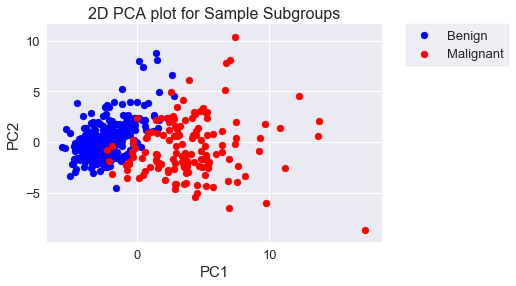

In [105]:
plt.scatter(df_train_2D[df_train_2D['diagnosis'] == 'B']['PC1'], df_train_2D[df_train_2D['diagnosis'] == 'B']['PC2'], color = 'blue', label = 'Benign')
plt.scatter(df_train_2D[df_train_2D['diagnosis'] == 'M']['PC1'], df_train_2D[df_train_2D['diagnosis'] == 'M']['PC2'], color = 'red', label = 'Malignant')

plt.legend(frameon=True, bbox_to_anchor=(1.4, 1.03), fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('2D PCA plot for Sample Subgroups', fontsize = 16)

Sample subgroup realtively clearly separated by clinical outcome

## Filter Method for feature selection:
- Initial selection of features. Select features with significant t-test scores
- However, filter method only select features based on statistical score of feature by outcome, it does not handle multicollinearity and includes all correlated features if they are important

In [93]:
from scipy import stats

In [94]:
# Divide datasets into benign and malignant:
data_scaled_B = data_scaled[data_scaled['diagnosis'] == 'B']
data_scaled_M = data_scaled[data_scaled['diagnosis'] == 'M']

In [283]:
print ('Features Selected by Filter Method: p-value \n')

filtered_features = list()
for i in feature_names[1:]:
    test = stats.ttest_ind(data_scaled_B[i], data_scaled_M[i])
    if test.pvalue < 0.05:
        print(i, ':', test.pvalue)
        filtered_features.append(i)

Features Selected by Filter Method: p-value 

radius_mean : 8.465940572263146e-96
texture_mean : 4.0586360478981613e-25
perimeter_mean : 8.436251036172569e-101
area_mean : 4.734564310307614e-88
smoothness_mean : 1.0518503592032693e-18
compactness_mean : 3.938263105886996e-56
concavity_mean : 9.966555755072963e-84
concave points_mean : 7.101150161057016e-116
symmetry_mean : 5.733384028466786e-16
radius_se : 9.73894865646109e-50
perimeter_se : 1.651905175849735e-47
area_se : 5.8955213926058635e-46
compactness_se : 9.975994654074837e-13
concavity_se : 8.260176167970112e-10
concave points_se : 3.0723087688180874e-24
radius_worst : 8.482291921683931e-116
texture_worst : 1.0780574879493623e-30
perimeter_worst : 5.771397139668948e-119
area_worst : 2.828847704286774e-97
smoothness_worst : 6.57514363398425e-26
compactness_worst : 7.069816352538678e-55
concavity_worst : 2.464663956782782e-72
concave points_worst : 1.9690997072164375e-124
symmetry_worst : 2.9511205771538056e-25
fractal_dimension_

In [284]:
X_train_filtered = X_train_scaled[X_train_scaled.columns & filtered_features]
X_test_filtered = X_test_scaled[X_test_scaled.columns & filtered_features]
X_train_filtered.shape

(398, 25)

### Combinding observations from swarmplot, correlation matrix, PCA, and filter selection, hand-select the following features considering association with outcome and multicollinearity: 

In [645]:
selected_features = ['radius_mean', 'texture_worst', 'smoothness_worst', 'concave points_mean', 'area_worst', 'symmetry_worst']
X_train_selected = X_train_scaled[X_train_scaled.columns & selected_features]
X_test_selected = X_test_scaled[X_test_scaled.columns & selected_features]
print('hand-selected features: \n', list(X_train_selected.columns))

hand-selected features: 
 ['radius_mean', 'concave points_mean', 'texture_worst', 'area_worst', 'smoothness_worst', 'symmetry_worst']


# 3. Classification Models:
http://scikit-learn.org/stable/modules/feature_selection.html

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV

## Define a function for computing performance metrics:
accuracy, precision, recall, f1, AUC

In [499]:
# Define a function for computing performance metrics: accuracy, precision, recall, f1, AUC
def performance_metric(prob_train, y_train, prob_test, y_test, threshold = 0.5):
    global roc_auc_test
    global accuracy_test
    # Performance on traning data:
    accuracy_train = accuracy_score(y_train, prob_train > threshold)
    precision_train = precision_score(y_train, prob_train > threshold)
    recall_train = recall_score(y_train, prob_train > threshold)
    f1_train = f1_score(y_train, prob_train > threshold)
    roc_auc_train = roc_auc_score(y_train, prob_train)
    
    # Performance on testing data:
    accuracy_test = accuracy_score(y_test, prob_test > threshold)
    precision_test = precision_score(y_test, prob_test > threshold)
    recall_test = recall_score(y_test, prob_test > threshold)
    f1_test = f1_score(y_test, prob_test > threshold)
    roc_auc_test = roc_auc_score(y_test, prob_test)

    
    # Performance metrics for train and test: 
    performance_train = [accuracy_train,precision_train,recall_train,f1_train,roc_auc_train]
    performance_test = [accuracy_test,precision_test,recall_test,f1_test,roc_auc_test]
    
    # Overall performance metric
    row_names = ["Accuracy","Precision","Recall","f1","AUC"]
    performance = pd.DataFrame({"Train": performance_train,
                               "Test": performance_test}, columns = ["Train", "Test"], index = row_names)
    print(performance)

In [500]:
# define function to perform train, test, and get model performance
def train_test_model(classifier, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    classifier.fit(X_train, y_train)

    # Make prediction on the training data
    pred_train = classifier.predict(X_train)
    prob_train = classifier.predict_proba(X_train)[:,1]

    # Make predictions on test data
    pred_test = classifier.predict(X_test)
    prob_test = classifier.predict_proba(X_test)[:,1] 

    # print model results:
    performance_metric(prob_train, y_train, prob_test, y_test)

In [501]:
# Initiate vectors to store AUC scores of each set of features:
AUC_original = []
AUC_filtered = []
AUC_selected = []
AUC_model = []

Accuracy_original = []
Accuracy_filtered = []
Accuracy_selected = []
Accuracy_model = []

## Model 1 -  Logistic Regression:
##### sklean.linear_model.LogisticRegression()
- From EDA, we know multicollinearity exist between features selected above. Use regularization on logistic regression to reduce multicollinearity and overfitting. 
- Use cross-validation to search for best regularization parameter c.

In [97]:
from sklearn.linear_model import LogisticRegression

##### Logistic regression without any tunning or feature selection:

In [502]:
logistic_clf = LogisticRegression()
print('Logistic Regression without any tunning or feature selection (30 features): ')
train_test_model(logistic_clf, X_train_scaled, y_train_binary, X_test_scaled, y_test_binary)

Logistic Regression without any tunning or feature selection (30 features): 
              Train      Test
Accuracy   0.994975  0.959064
Precision  1.000000  0.968254
Recall     0.986301  0.924242
f1         0.993103  0.945736
AUC        0.997880  0.994228


##### Logistic Regression with cross validation (30 features):

In [503]:
logistic_clf = LogisticRegression()
param_grid = {"C": [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
              "penalty": ['l1', 'l2']}
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(logistic_clf, param_grid, cv=5, scoring= score_type)
grid = grid.fit(X_train_scaled, y_train_binary)

# Re-train logistic regression with selected parameters:
logistic_clf = grid.best_estimator_
logistic_clf.fit(X_train_scaled, y_train_binary)

print('Logistic Regression with cross-validation (30 features): ')
train_test_model(logistic_clf, X_train_scaled, y_train_binary, X_test_scaled, y_test_binary)
AUC_original.append(roc_auc_test)
Accuracy_original.append(accuracy_test)

Logistic Regression with cross-validation (30 features): 
              Train      Test
Accuracy   0.989950  0.964912
Precision  0.993056  0.983871
Recall     0.979452  0.924242
f1         0.986207  0.953125
AUC        0.996331  0.994661


- Slight reductiion in overfitting after tuning parameters for regularization

##### Logistic Regression with filtered features (25 features):

In [504]:
logistic_clf = LogisticRegression()
param_grid = {"C": [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
              "penalty": ['l1', 'l2']}
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(logistic_clf, param_grid, cv=5, scoring= score_type)
grid = grid.fit(X_train_filtered, y_train_binary)

# Re-train logistic regression with selected parameters:
logistic_clf = grid.best_estimator_
logistic_clf.fit(X_train_filtered, y_train_binary)

print('Logistic Regression with cross-validation and feature filter (25 features): ')
train_test_model(logistic_clf, X_train_filtered, y_train_binary, X_test_filtered, y_test_binary)
AUC_filtered.append(roc_auc_test)
Accuracy_filtered.append(accuracy_test)

Logistic Regression with cross-validation and feature filter (25 features): 
              Train      Test
Accuracy   0.989950  0.959064
Precision  0.993056  0.983607
Recall     0.979452  0.909091
f1         0.986207  0.944882
AUC        0.996630  0.994661


- No obvious improvement after selecting feature by filter method

##### Logistic Regression with hand-selected features (6 features):

In [646]:
logistic_clf = LogisticRegression()
param_grid = {"C": [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
              "penalty": ['l1', 'l2']}
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(logistic_clf, param_grid, cv=5, scoring= score_type)
grid = grid.fit(X_train_selected, y_train_binary)

# Re-train logistic regression with selected parameters:
logistic_clf = grid.best_estimator_
logistic_clf.fit(X_train_selected, y_train_binary)

print('Logistic Regression with cross-validation and selected features (6 features): ')
train_test_model(logistic_clf, X_train_selected, y_train_binary, X_test_selected, y_test_binary)
AUC_selected.append(roc_auc_test)
Accuracy_selected.append(accuracy_test)

Logistic Regression with cross-validation and selected features (6 features): 
              Train      Test
Accuracy   0.984925  0.947368
Precision  1.000000  0.938462
Recall     0.958904  0.924242
f1         0.979021  0.931298
AUC        0.990134  0.992641


##### Feature Selection for Logistic Regression with SelectFromModel():

In [506]:
# Feature selection for regression:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train_scaled, y_train_binary)
logistic_model = SelectFromModel(logistic_clf, prefit = True)
X_train_selected_logistic = logistic_model.transform(X_train_scaled)
X_test_selected_logistic = logistic_model.transform(X_test_scaled)

# Get feature names from final logistic regression model:
selected_features_logistic = list(X_train_scaled.T.iloc[logistic_model.get_support()].index)
print('features selected for logistic regression: \n', selected_features_logistic)

features selected for logistic regression: 
 ['compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


##### Logistic Regression with model selected features (15 features):

In [647]:
logistic_clf = LogisticRegression()
param_grid = {"C": [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
              "penalty": ['l1', 'l2']}
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(logistic_clf, param_grid, cv=5, scoring= score_type)
grid = grid.fit(X_train_selected_logistic, y_train_binary)

# Re-train logistic regression with selected parameters:
logistic_clf = grid.best_estimator_
logistic_clf.fit(X_train_selected_logistic, y_train_binary)

print('Logistic Regression with cross-validationa and feature selection from model (15 features): ')
train_test_model(logistic_clf, X_train_selected_logistic, y_train_binary, X_test_selected_logistic, y_test_binary)
AUC_model.append(roc_auc_test)
Accuracy_model.append(accuracy_test)

Logistic Regression with cross-validationa and feature selection from model (15 features): 
              Train      Test
Accuracy   0.987437  0.953216
Precision  1.000000  0.983333
Recall     0.965753  0.893939
f1         0.982578  0.936508
AUC        0.997092  0.995094


- No obvious improvement after select features from model

## Model 2 - Random Forest:

In [253]:
from sklearn.ensemble import RandomForestClassifier

##### Random Forest Classifier without tuning or feature selection:

In [508]:
forest_clf = RandomForestClassifier()
print('Random Forest without any tunning or feature selection (30 features): ')
train_test_model(forest_clf, X_train_scaled, y_train_binary, X_test_scaled, y_test_binary)

Random Forest without any tunning or feature selection (30 features): 
           Train      Test
Accuracy     1.0  0.959064
Precision    1.0  0.968254
Recall       1.0  0.924242
f1           1.0  0.945736
AUC          1.0  0.983189


##### Random Forest Classifier with Cross Validation (30 features):

In [509]:
forest_clf = RandomForestClassifier()
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(forest_clf, param_grid, cv=5, scoring= score_type)
grid = grid.fit(X_train_scaled, y_train_binary)

# Re-train logistic regression with selected parameters:
forest_clf = grid.best_estimator_
forest_clf.fit(X_train_scaled, y_train_binary)

print('Random Forest with cross-validation (30 features): ')
train_test_model(forest_clf, X_train_scaled, y_train_binary, X_test_scaled, y_test_binary)
AUC_original.append(roc_auc_test)
Accuracy_original.append(accuracy_test)

Random Forest with cross-validation (30 features): 
              Train      Test
Accuracy   0.992462  0.941520
Precision  0.993103  0.937500
Recall     0.986301  0.909091
f1         0.989691  0.923077
AUC        0.999946  0.988745


##### Random Forest Classifier with filtered features (25 features):

In [510]:
forest_clf = RandomForestClassifier()
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(forest_clf, param_grid, cv=5, scoring= score_type)
grid = grid.fit(X_train_filtered, y_train_binary)

# Re-train logistic regression with selected parameters:
forest_clf = grid.best_estimator_
forest_clf.fit(X_train_filtered, y_train_binary)

print('Random Forest with cross-validation and filtered features (25 features): ')
train_test_model(forest_clf, X_train_filtered, y_train_binary, X_test_filtered, y_test_binary)
AUC_filtered.append(roc_auc_test)
Accuracy_filtered.append(accuracy_test)

Random Forest with cross-validation and filtered features (25 features): 
              Train      Test
Accuracy   0.992462  0.947368
Precision  0.993103  0.925373
Recall     0.986301  0.939394
f1         0.989691  0.932331
AUC        0.999837  0.988889


##### Random Forest Classifier with hand- selected features (6 features):

In [511]:
forest_clf = RandomForestClassifier()
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(forest_clf, param_grid, cv=5, scoring= score_type)
grid = grid.fit(X_train_selected, y_train_binary)

# Re-train logistic regression with selected parameters:
forest_clf = grid.best_estimator_
forest_clf.fit(X_train_selected, y_train_binary)

print('Random Forest with cross-validation and filtered features (6 features): ')
train_test_model(forest_clf, X_train_selected, y_train_binary, X_test_selected, y_test_binary)
AUC_selected.append(roc_auc_test)
Accuracy_selected.append(accuracy_test)

Random Forest with cross-validation and filtered features (6 features): 
              Train      Test
Accuracy   0.992462  0.964912
Precision  1.000000  0.968750
Recall     0.979452  0.939394
f1         0.989619  0.953846
AUC        0.999891  0.992641


##### Recursive Feature Elimination to select features: 

In [512]:
forest_clf = RandomForestClassifier()
score_type = make_scorer(roc_auc_score)
rfecv = RFECV(estimator = forest_clf, cv = 5, scoring = score_type)
rfecv.fit(X_train_scaled, y_train_binary)
selected_features_forest = list(X_train_scaled.T.iloc[rfecv.support_].index)

X_train_selected_forest = rfecv.transform(X_train_scaled)
X_test_selected_forest = rfecv.transform(X_test_scaled)

print('number of features selected: ', rfecv.n_features_)
print('features selected: \n', selected_features_forest)

number of features selected:  14
features selected: 
 ['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'concave points_mean', 'area_se', 'compactness_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']


##### Random Forest with model selected features (14 features):

In [636]:
forest_clf = RandomForestClassifier()
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(forest_clf, param_grid, cv=5, scoring= score_type)
grid = grid.fit(X_train_filtered, y_train_binary)

# Re-train logistic regression with selected parameters:
forest_clf = grid.best_estimator_
forest_clf.fit(X_train_selected_forest, y_train_binary)

print('Random Forest with cross-validation and selected features (14 features): ')
train_test_model(forest_clf, X_train_selected_forest, y_train_binary, X_test_selected_forest, y_test_binary)
AUC_model.append(roc_auc_test)
Accuracy_model.append(accuracy_test)

Random Forest with cross-validation and selected features (14 features): 
              Train      Test
Accuracy   0.992462  0.947368
Precision  1.000000  0.938462
Recall     0.979452  0.924242
f1         0.989619  0.931298
AUC        0.999918  0.988528


## Model 3 - Gradient Boosting Trees:
##### sklearn.ensemble.GradientBoostingClassifier()

In [514]:
from sklearn.ensemble import GradientBoostingClassifier

In [515]:
gradient_clf = GradientBoostingClassifier()
print('Gradient Boosting without any tunning or feature selection (30 features): ')
train_test_model(gradient_clf, X_train_scaled, y_train_binary, X_test_scaled, y_test_binary)

Gradient Boosting without any tunning or feature selection (30 features): 
           Train      Test
Accuracy     1.0  0.935673
Precision    1.0  0.923077
Recall       1.0  0.909091
f1           1.0  0.916031
AUC          1.0  0.984848


##### Gradient Boosting with Cross Validation (30 features):

In [516]:
gradient_clf = GradientBoostingClassifier()
param_grid = {'learning_rate': [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.2, 0.3, 0.5],
              'max_depth': [3, 5, 10, 15],
              'n_estimators': [50, 100, 200, 250]
             }
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(gradient_clf, param_grid, cv=5, scoring = score_type)
grid = grid.fit(X_train_scaled, y_train_binary)

# Re-train logistic regression with selected parameters:
gradient_clf = grid.best_estimator_
gradient_clf.fit(X_train_scaled, y_train_binary)

print('Gradient Boost with cross-validation (30 features): ')
train_test_model(gradient_clf, X_train_scaled, y_train_binary, X_test_scaled, y_test_binary)
AUC_original.append(roc_auc_test)
Accuracy_original.append(accuracy_test)

Gradient Boost with cross-validation (30 features): 
           Train      Test
Accuracy     1.0  0.918129
Precision    1.0  0.882353
Recall       1.0  0.909091
f1           1.0  0.895522
AUC          1.0  0.984993


- No improvement on overfitting

##### Gradient Boosting with filtered features (25 features):

In [517]:
gradient_clf = GradientBoostingClassifier()
param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.8, 1.0],
              'max_depth': [3, 5, 10, 15],
              'n_estimators': [50, 100, 200, 250]
             }
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(gradient_clf, param_grid, cv=5, scoring= score_type)
grid = grid.fit(X_train_filtered, y_train_binary)

# Re-train logistic regression with selected parameters:
gradient_clf = grid.best_estimator_
gradient_clf.fit(X_train_filtered, y_train_binary)

print('Gradient Boost with cross-validation (25 features): ')
train_test_model(gradient_clf, X_train_filtered, y_train_binary, X_test_filtered, y_test_binary)
AUC_filtered.append(roc_auc_test)
Accuracy_filtered.append(accuracy_test)

Gradient Boost with cross-validation (25 features): 
           Train      Test
Accuracy     1.0  0.918129
Precision    1.0  0.893939
Recall       1.0  0.893939
f1           1.0  0.893939
AUC          1.0  0.983261


##### Gradient Boosting with hand-selected features (6 features):

In [518]:
gradient_clf = GradientBoostingClassifier()
param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.8, 1.0],
              'max_depth': [3, 5, 10, 15],
              'n_estimators': [50, 100, 200, 250]
             }
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(gradient_clf, param_grid, cv=5, scoring= score_type)
grid = grid.fit(X_train_selected, y_train_binary)

# Re-train logistic regression with selected parameters:
gradient_clf = grid.best_estimator_
gradient_clf.fit(X_train_selected, y_train_binary)

print('Gradient Boost with hand selected features (6 features): ')
train_test_model(gradient_clf, X_train_selected, y_train_binary, X_test_selected, y_test_binary)
AUC_selected.append(roc_auc_test)
Accuracy_selected.append(accuracy_test)

Gradient Boost with hand selected features (6 features): 
           Train      Test
Accuracy     1.0  0.959064
Precision    1.0  0.968254
Recall       1.0  0.924242
f1           1.0  0.945736
AUC          1.0  0.991342


##### Recursive Feature Elimination to Select Features:

In [519]:
gradient_clf = GradientBoostingClassifier()
score_type = make_scorer(roc_auc_score)
rfecv = RFECV(estimator = gradient_clf, cv = 5, scoring = score_type)
rfecv.fit(X_train_scaled, y_train_binary)
selected_features_gradient = list(X_train_scaled.T.iloc[rfecv.support_].index)

X_train_selected_gradient = rfecv.transform(X_train_scaled)
X_test_selected_gradient = rfecv.transform(X_test_scaled)

print('number of features selected: ', rfecv.n_features_)
print('features selected: \n', selected_features_gradient)

number of features selected:  30
features selected: 
 ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


##### Gradient Boosting with model selected features (9 features):

In [520]:
gradient_clf = GradientBoostingClassifier()
param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.8, 1.0],
              'max_depth': [3, 5, 10, 15],
              'n_estimators': [50, 100, 200, 250]
             }
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(gradient_clf, param_grid, cv=5, scoring= score_type)
grid = grid.fit(X_train_selected_gradient, y_train_binary)

# Re-train logistic regression with selected parameters:
gradient_clf = grid.best_estimator_
gradient_clf.fit(X_train_selected_gradient, y_train_binary)

print('Gradient Boost with cross-validation selected features (9 features): ')
train_test_model(gradient_clf, X_train_selected_gradient, y_train_binary, X_test_selected_gradient, y_test_binary)
AUC_model.append(roc_auc_test)
Accuracy_model.append(accuracy_test)

Gradient Boost with cross-validation selected features (9 features): 
           Train      Test
Accuracy     1.0  0.935673
Precision    1.0  0.936508
Recall       1.0  0.893939
f1           1.0  0.914729
AUC          1.0  0.984993


## Model 4 - KNN:
##### sklearn.neighbors.KNeighborsClassifier()

In [521]:
from sklearn.neighbors import KNeighborsClassifier

##### KNN without any tunning or feature selection:

In [522]:
knn_clf = KNeighborsClassifier()
print ('KNN without tunning or feature selection: ')
train_test_model(knn_clf, X_train_scaled, y_train_binary, X_test_scaled, y_test_binary)

KNN without tunning or feature selection: 
              Train      Test
Accuracy   0.979899  0.941520
Precision  0.992857  0.966667
Recall     0.952055  0.878788
f1         0.972028  0.920635
AUC        0.998410  0.976479


##### KNN with cross-validation (30 features): 

In [523]:
knn_clf = KNeighborsClassifier()
param_grid = {"n_neighbors": [1, 3, 5, 10, 15, 20],
              "leaf_size": [10,20,30,40]}
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(knn_clf, param_grid, cv=5, scoring= score_type)
grid = grid.fit(X_train_scaled, y_train_binary)

# Re-train logistic regression with selected parameters:
knn_clf = grid.best_estimator_
knn_clf.fit(X_train_scaled, y_train_binary)

print('KNN with cross-validation (30 features): ')
train_test_model(knn_clf, X_train_scaled, y_train_binary, X_test_scaled, y_test_binary)
AUC_original.append(roc_auc_test)
Accuracy_original.append(accuracy_test)

KNN with cross-validation (30 features): 
              Train      Test
Accuracy   0.979899  0.941520
Precision  0.992857  0.966667
Recall     0.952055  0.878788
f1         0.972028  0.920635
AUC        0.998410  0.976479


- No improvement after parameter tuning for original feautres

##### KNN with filtered features (25 features): 

In [524]:
knn_clf = KNeighborsClassifier()
param_grid = {"n_neighbors": [1, 3, 5, 10, 15, 20],
              "leaf_size": [10,20,30,40]}
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(knn_clf, param_grid, cv=5, scoring= score_type)
grid = grid.fit(X_train_filtered, y_train_binary)

# Re-train logistic regression with selected parameters:
knn_clf = grid.best_estimator_
knn_clf.fit(X_train_filtered, y_train_binary)

print('KNN with cross-validation and feature filter (25 features): ')
train_test_model(knn_clf, X_train_filtered, y_train_binary, X_test_filtered, y_test_binary)
AUC_filtered.append(roc_auc_test)
Accuracy_filtered.append(accuracy_test)

KNN with cross-validation and feature filter (25 features): 
              Train      Test
Accuracy   0.984925  0.947368
Precision  0.992958  0.952381
Recall     0.965753  0.909091
f1         0.979167  0.930233
AUC        0.998736  0.969553


- Very slight improvement on accuracy

##### KNN with hand-selected features (6 features):

In [525]:
knn_clf = KNeighborsClassifier()
param_grid = {"n_neighbors": [1, 3, 5, 10, 15, 20],
              "leaf_size": [10,20,30,40]}
score_type = make_scorer(roc_auc_score)

# Run grid search
grid = GridSearchCV(knn_clf, param_grid, cv=5, scoring= score_type)
grid = grid.fit(X_train_selected, y_train_binary)

# Re-train logistic regression with selected parameters:
knn_clf = grid.best_estimator_
knn_clf.fit(X_train_selected, y_train_binary)

print('KNN with cross-validation and feature filter (6 features): ')
train_test_model(knn_clf, X_train_selected, y_train_binary, X_test_selected, y_test_binary)
AUC_selected.append(roc_auc_test)
Accuracy_selected.append(accuracy_test)

KNN with cross-validation and feature filter (6 features): 
              Train      Test
Accuracy   0.982412  0.947368
Precision  1.000000  0.952381
Recall     0.952055  0.909091
f1         0.975439  0.930233
AUC        0.999198  0.971429


## Compare model performances: 

In [629]:
x_label = ['Logistic Regression', 'Random Forest', 'Gradient Boost', 'KNN']
new_x1, new_y1 = zip(*sorted(zip(x_label, AUC_original)))
new_x2, new_y2 = zip(*sorted(zip(x_label, AUC_filtered)))
new_x3, new_y3 = zip(*sorted(zip(x_label, AUC_selected)))

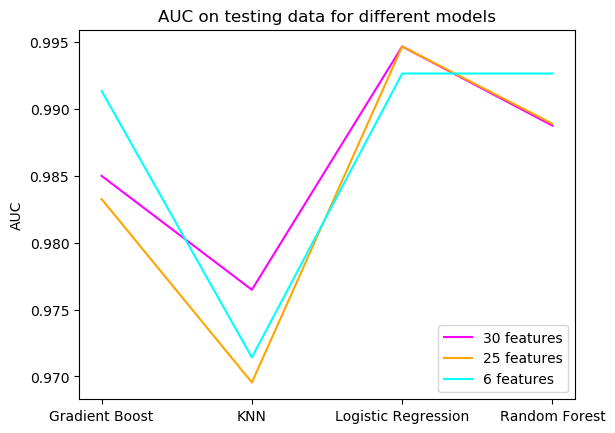

In [631]:
plt.rcParams.update(plt.rcParamsDefault)
plt.plot(new_x1, new_y1, color = 'magenta', label = '30 features')
plt.plot(new_x2, new_y2, color = 'orange', label = '25 features')
plt.plot(new_x3, new_y3, color = 'cyan', label = '6 features')
plt.title('AUC on testing data for different models')
plt.ylabel('AUC')

plt.legend()

In [634]:
x_label = ['Logistic Regression', 'Random Forest', 'Gradient Boost', 'KNN']
new_x1, new_y1 = zip(*sorted(zip(x_label, Accuracy_original)))
new_x2, new_y2 = zip(*sorted(zip(x_label, Accuracy_filtered)))
new_x3, new_y3 = zip(*sorted(zip(x_label, Accuracy_selected)))

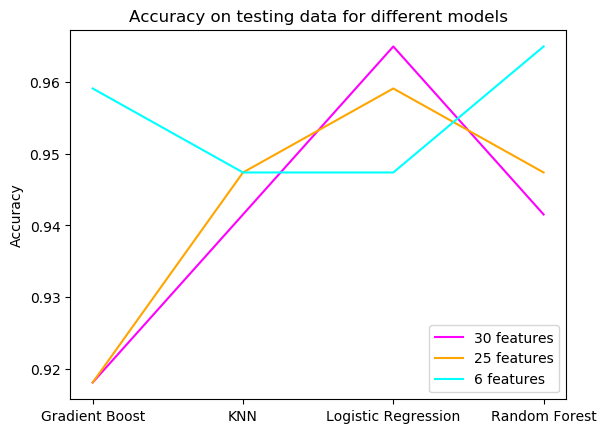

In [635]:
plt.rcParams.update(plt.rcParamsDefault)

plt.plot(new_x1, new_y1, color = 'magenta', label = '30 features')
plt.plot(new_x2, new_y2, color = 'orange', label = '25 features')
plt.plot(new_x3, new_y3, color = 'cyan', label = '6 features')
plt.title('Accuracy on testing data for different models')
plt.ylabel('Accuracy')

plt.legend()